In [24]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
#Split the data (kmeans = 0 or 1)

In [46]:

data = pd.read_csv('communities_kmeans.csv')
#data.head()
data_0 = data[data["KmeansLabel"]==0]
data_1 = data[data["KmeansLabel"]==1]

In [50]:
len(data_1.index)

943

In [21]:

X_0 = data_0[[x for x in data_0.columns if x not in ["state", "communityname", "ViolentCrimesPerPop", "fold"]]]
X_1 = data_1[[x for x in data_1.columns if x not in ["state", "communityname", "ViolentCrimesPerPop", "fold"]]]
Y_0 = data_0["ViolentCrimesPerPop"]
Y_1 = data_1["ViolentCrimesPerPop"]


In [22]:
#Split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_0, Y_0, test_size = 0.2)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.2)

In [52]:
len(X_test_0.index)

211

In [26]:
#decision tree regressor
clf_0= DecisionTreeRegressor( max_depth = 10, max_leaf_nodes = 10)
clf_0= clf_0.fit(X_train_0,Y_train_0)
clf_1 =DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 10)
clf_1 = clf_1.fit(X_train_1,Y_train_1)

In [28]:
#Predict the result
y_predict_0 = clf_0.predict(X_test_0)
y_predict_1 = clf_1.predict(X_test_1)
y_predict_0.reshape(-1,1)


array([[0.09023256],
       [0.51445545],
       [0.52      ],
       [0.29196429],
       [0.09023256],
       [0.29196429],
       [0.19760204],
       [0.36716535],
       [0.51445545],
       [0.19760204],
       [0.21977273],
       [0.21977273],
       [0.19760204],
       [0.09023256],
       [0.53689655],
       [0.19760204],
       [0.53689655],
       [0.09023256],
       [0.19760204],
       [0.19760204],
       [0.19760204],
       [0.36716535],
       [0.29196429],
       [0.51445545],
       [0.19760204],
       [0.19760204],
       [0.29196429],
       [0.19760204],
       [0.36716535],
       [0.29196429],
       [0.4461194 ],
       [0.4461194 ],
       [0.84735849],
       [0.29196429],
       [0.09023256],
       [0.09023256],
       [0.09023256],
       [0.19760204],
       [0.53689655],
       [0.84735849],
       [0.36716535],
       [0.29196429],
       [0.09023256],
       [0.51445545],
       [0.51445545],
       [0.09023256],
       [0.21977273],
       [0.367

In [52]:
!pip3 install sklearn==0.22
!pip3 install pydotplus
!pip3 install graphviz
!pip3 install matplotlib
from six import StringIO
from sklearn.tree import export_graphviz
#from sklearn.externals.six import  StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

ERROR: Could not find a version that satisfies the requirement sklearn==0.22 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.22


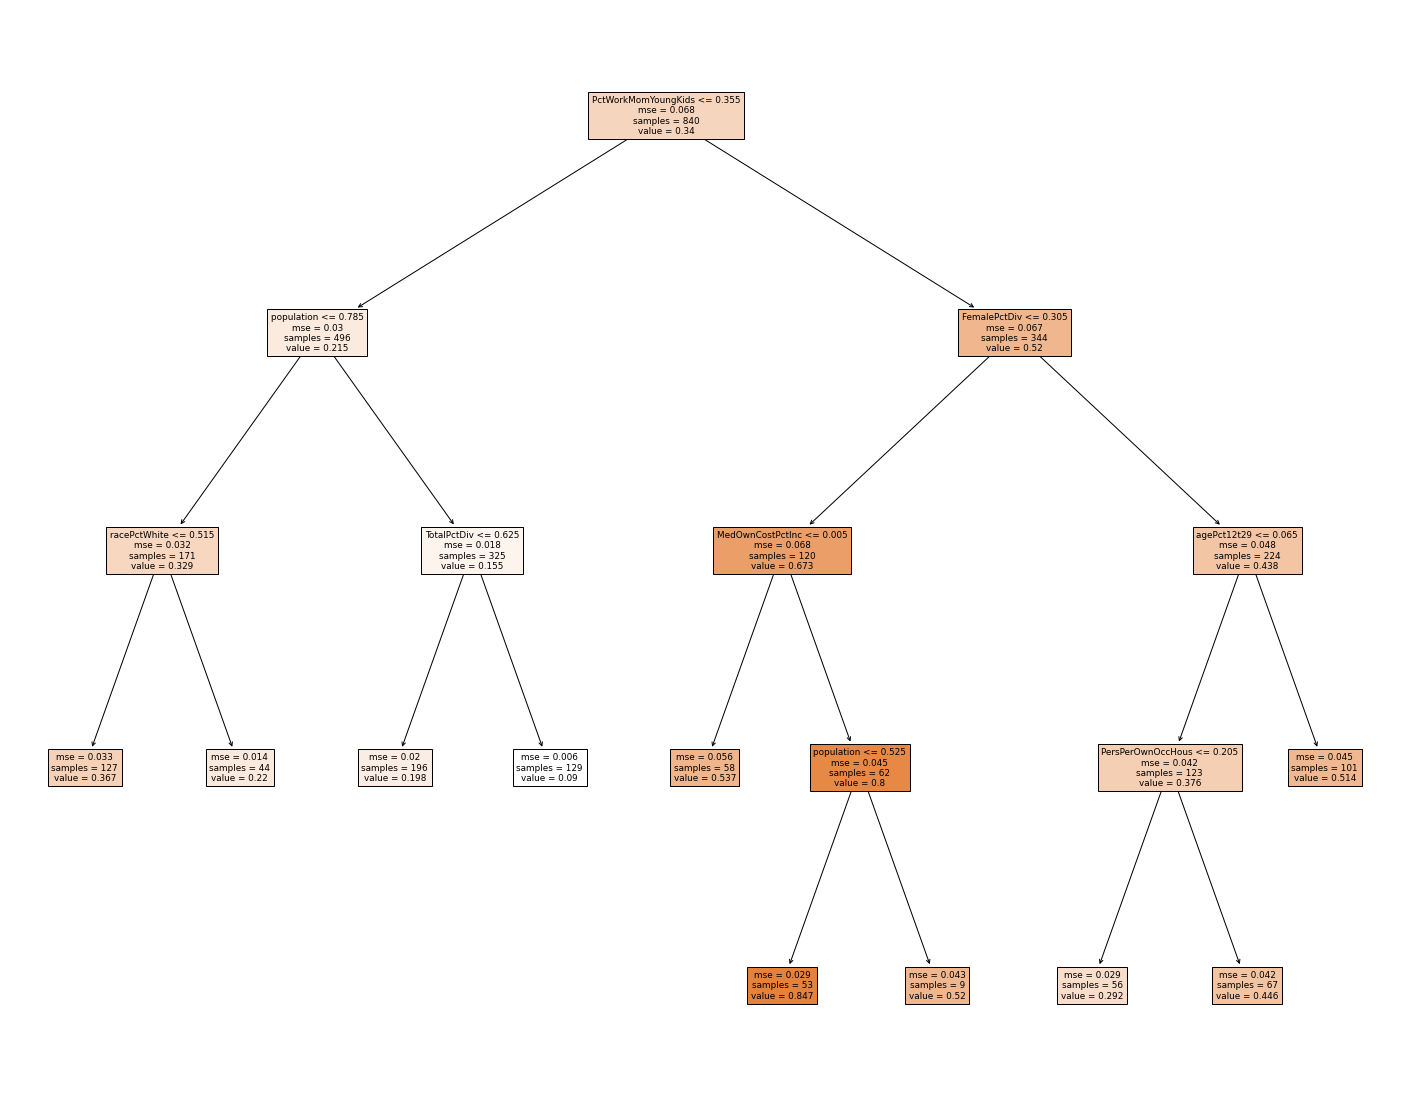

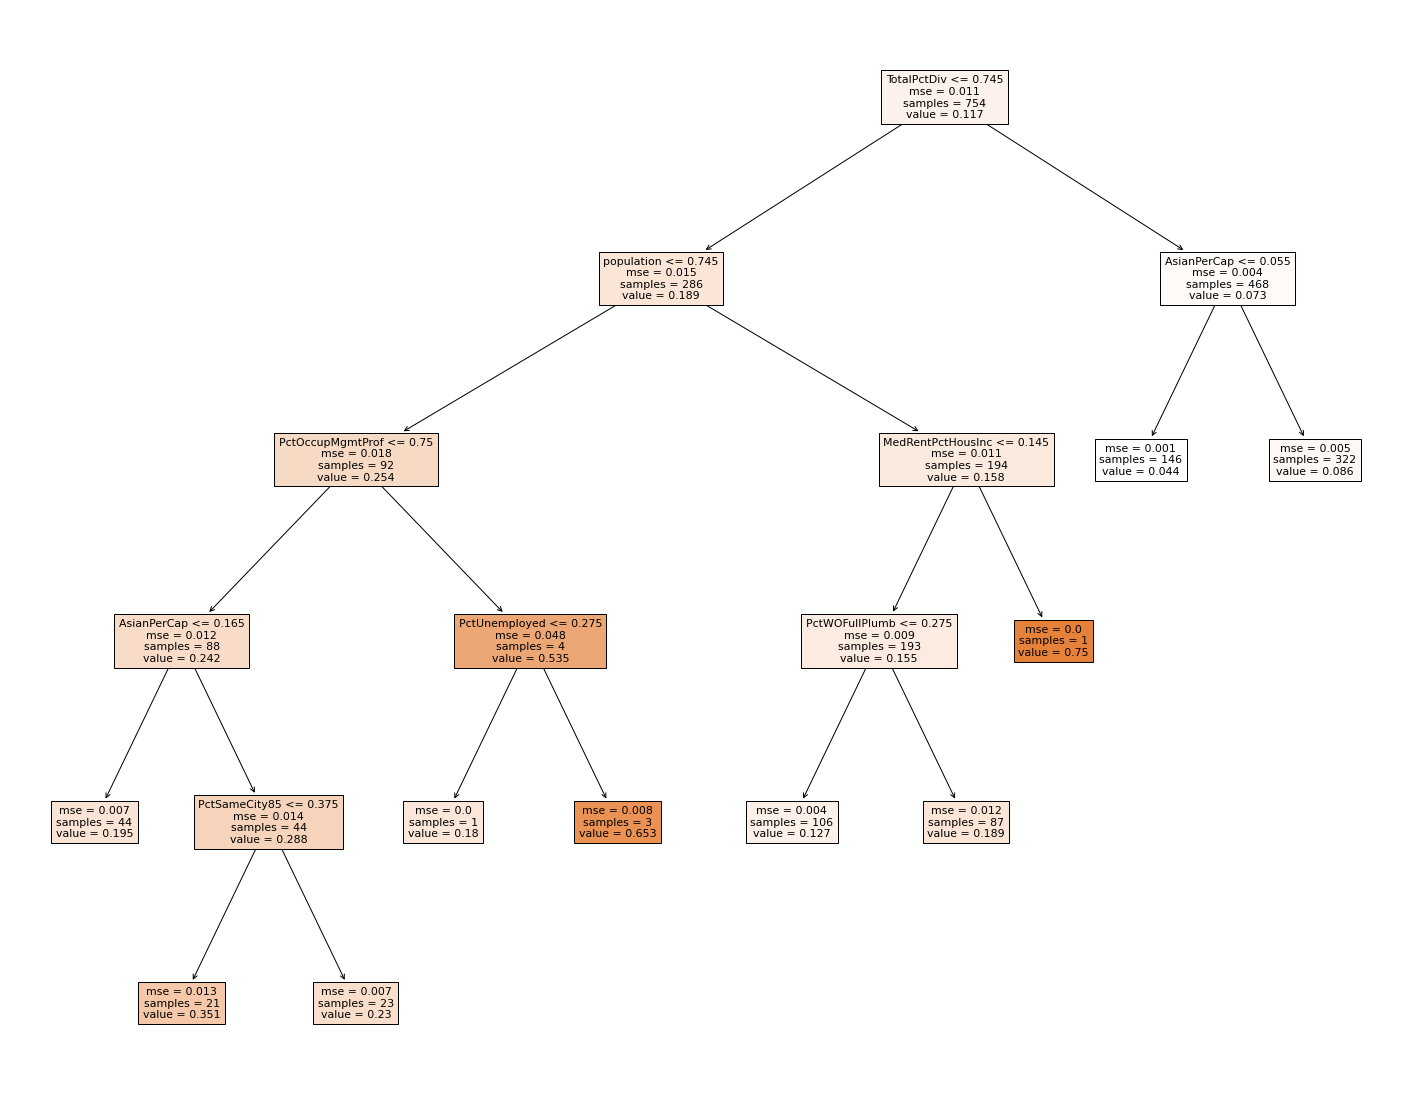

In [30]:


#print text representation
#text_representation = tree.export_text(clf)
#print(text_representation)

#Plot tree with k means = 0
names = list(data.columns.values)
plt.figure(figsize=(25,20))
tree.plot_tree(clf_0,filled = True, feature_names = names)
plt.show()

#Plot tree with k means = 1
names = list(data.columns.values)
plt.figure(figsize=(25,20))
tree.plot_tree(clf_1,filled = True, feature_names = names)
plt.show()


#view decision tree model
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data, filled = True, rounded = True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Image(graph.create_png())
#dot_data = tree.export_graphviz(clf, out_file = None, filled = True)
#graph = graphviz.Source(dot_data, format="png") 
#graph

In [34]:
#Compare the real value with predicted value (0)
df_0 = pd.DataFrame({'Real Value': Y_test_0.values.reshape(-1), 'Predict Value': y_predict_0.reshape(-1)})

#Compare the real value with predicted value (1)
df_1 = pd.DataFrame({'Real Value': Y_test_1.values.reshape(-1), 'Predict Value': y_predict_1.reshape(-1)})

df_0.head()

,Real Value,Predict Value
0,0.06,0.090233
1,0.15,0.514455
2,0.59,0.520000
3,0.21,0.291964
4,0.63,0.090233


[[0.19 0.33 0.02 ... 0.26 0.2  0.32]
 [0.   0.16 0.12 ... 0.12 0.45 0.  ]
 [0.   0.42 0.49 ... 0.21 0.02 0.  ]
 ...
 [0.16 0.37 0.25 ... 0.32 0.18 0.91]
 [0.08 0.51 0.06 ... 0.38 0.33 0.22]
 [0.2  0.78 0.14 ... 0.3  0.05 1.  ]]
0.0


Text(0.5, 0, 'Actual Crime Rate')

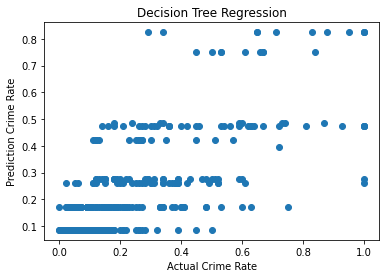

In [11]:
#Visualizing the Decision Tree regression Results
X = np.array(X)
print(X)
print(np.min(X))
X_grid = np.arange(np.min(X), np.max(X),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(Y_test, y_predict)
plt.title('Decision Tree Regression')
plt.ylabel('Prediction Crime Rate')
plt.xlabel('Actual Crime Rate')

In [40]:
#Calculate test MSE with data = 0
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test_0, y_predict_0)


0.04148342669063611

In [41]:
#Calculate test MSE with data = 1
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test_1, y_predict_1)

0.011789944550964907

In [76]:
#Calculate corss-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(clf, X, Y, cv =5)
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.549 (0.047)


In [37]:
#prediction with kmeans= 0
data_subset_0 = data_0[['state','population']]
#data_subset.head()
df_0 = pd.DataFrame(data_subset_0)
y_pred_0 = clf_0.predict(X_0)
df_0['Prediction'] = y_pred_0
df_0.to_csv('~/Desktop/export_dataframe_0.csv',index = False, header = True)




In [38]:
#prediction with kmeans = 1
data_subset_1 = data_1[['state','population']]
#data_subset.head()
df_1 = pd.DataFrame(data_subset_1)
y_pred_1 = clf_1.predict(X_1)
df_1['Prediction'] = y_pred_1
df_1.to_csv('~/Desktop/export_dataframe_1.csv',index = False, header = True)

In [45]:
frames = [df_0, df_1] 
result = pd.concat(frames)
result.to_csv('~/Desktop/Prediction.csv',index = False, header = True)
result

,state,population,Prediction
1,53,0.00,0.367165
2,24,0.00,0.291964
7,6,0.01,0.446119
8,21,0.03,0.197602
15,19,0.03,0.197602
...,...,...,...
1984,39,0.01,0.085870
1986,9,0.05,0.085870
1987,44,0.01,0.085870
1989,12,0.01,0.126887


In [42]:
#Calculate MSE of data given kmeans = 0
mean_squared_error(Y_0, y_pred_0)

0.03099637284475507

In [43]:
#Calculate MSE of data given kmeans = 1
mean_squared_error(Y_1, y_pred_1)

0.006726860258201522

In [1]:
#residual
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(clf, hist=False)
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

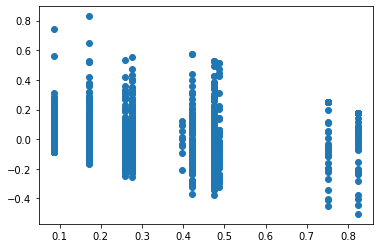

In [29]:
import matplotlib.pyplot as plt
y_hat = clf.predict(X_train)
residual = Y_train- y_hat
plt.scatter(y_hat,residual)

plt.show()

In [53]:
#Calculate test MSE for Kmeans = 0 and Kmeans = 1
(len(X_test_1.index)*0.011789944550964907+ len(X_test_0.index)*0.04148342669063611)/(len(X_test_0.index)+len(X_test_1.index))


0.027453256379641466

In [54]:
#Calculate entire MSE for Kmeans = 0 and Kmeans = 1
(len(data_0.index)*0.03099637284475507 + len(data_1.index)*0.006726860258201522)/(len(data_0.index)+len(data_1.index))

0.019518865137072024